In [1]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# imports
from utils import *
from models import *

In [2]:
loaded_train = load_pickle("../dataframes/app_train_preprocessed.pickle")
loaded_test = load_pickle("../dataframes/app_test_preprocessed.pickle")

train_Y = loaded_train['TARGET'].values
loaded_train.drop(columns=['TARGET', 'SK_ID_CURR'], inplace=True)
loaded_test.drop(columns=['SK_ID_CURR'], inplace=True)

# convert from dataframes to arrays
train_X = loaded_train.values
test_X = loaded_test.values

app_train = load_app_training_data()
app_test = load_test_data()

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)


In [3]:
# plt.style.use('fivethirtyeight')

# # print(loaded_train['DAYS_BIRTH'])

# plt.hist(loaded_train['DAYS_BIRTH'], edgecolor='k', bins=25)
# plt.title('Age of Client')
# plt.xlabel('Age (years)')
# plt.ylabel('Count')

2


In [118]:
# plt.style.use('fivethirtyeight')

# app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# # print(app_train['DAYS_BIRTH'])

# plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
# plt.title('Age of Client')
# plt.xlabel('Age (years)')
# plt.ylabel('Count')

In [27]:
# # do basic pre-processing
# def pre_process(train_data, test_data):
# #     train_data, test_data = encode_binary_cols(train_data, test_data) # purposefully left out - was taking too long
#     train_data, test_data = one_hot_encode(train_data, test_data)
#     train_data, test_data = align_data(train_data, test_data)
#     train_data, test_data = remove_days_employed_anomaly(train_data, test_data)
    
#     train_data, test_data = remove_missing_cols(train_data, test_data, thr=0.90)
    
#     train_data.drop(columns=['TARGET', 'SK_ID_CURR'],inplace=True)
#     test_data.drop(columns=['SK_ID_CURR'], inplace= True)
#     train_data, test_data = mean_imputation(train_data, test_data)

#     return train_data, test_data

# train_data, test_data = pre_process(app_train.copy(), app_test.copy())

In [25]:
# # convert from dataframes to arrays
# train_X = train_data.values
# test_X = test_data.values

In [26]:
# model, predictions = baseline_log_reg(train_X, train_Y, test_X, save_path=None, C=0.0001) # don't save model as save_path=None
# # create_and_save_submission(test_ids, predictions, "../test_predictions/filename.csv") # Add filename

Function to see the type of the loans taken and on a seperate plot see the percent of the loans with TARGET value 1 (not return loan).

In [10]:
def plot_stats(feature, label_rotation=False, horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})
    # Calculate the percentage of target=1 per category value
    category_percentage = app_train[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    category_percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,14))
        
    sns.set_color_codes("dark")
    sns.set(font_scale=1)
    s = sns.barplot(ax=ax1, x = feature, y = "Number of contracts", data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=category_percentage[feature], data = category_percentage)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.ylabel("Percent of target with value 1 [%]", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    plt.show();
    

In [5]:
def plot_distribution(var):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 1]
    
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    
    for feature in var:
        i += 1
        plt.subplot(2, 2, i)
        sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        
    plt.show();

Plotted the contract types of the people that currently have a credit with Home Credit. As it can be noted, the number of cash loans is substantially higher than the revolving loans, but the % of repayment of revolving loans is relatively close to the cash loans, which means there is a fairly high number of people not repaying them.

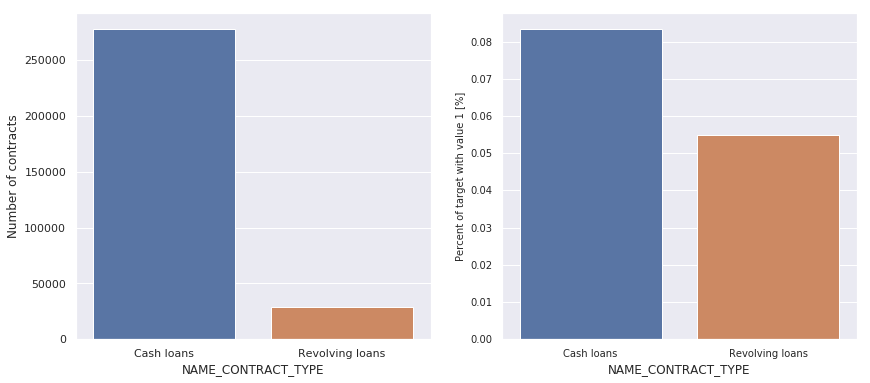

In [11]:
plot_stats('NAME_CONTRACT_TYPE')

Plotted the marital status of people currently recorded with Home Credit. It gives an idea of the type of people that are looking to get loans. It can be noticed that the married status is dominant. The repayment percentage is relatively close to one another.

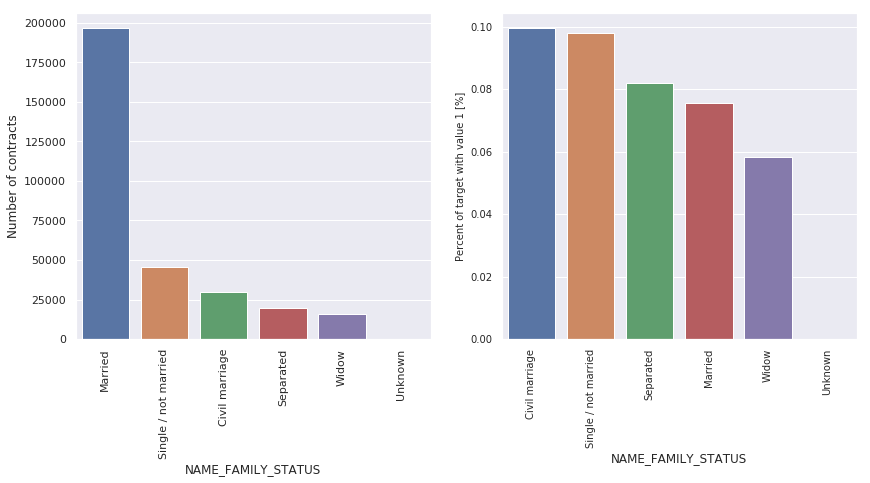

In [12]:
plot_stats('NAME_FAMILY_STATUS', True, True)

Plotted the amount of family members the clients have. It ca be noticed that families with 6 or less members (3-4 children) have a not repaying rate of 10%, while families with more than 6 members tend to not be able to repay their loans. The chances of not repaying a loan is directly proportional to the number of family members. More family members means a higher chance that the family is not able to repay their loan.

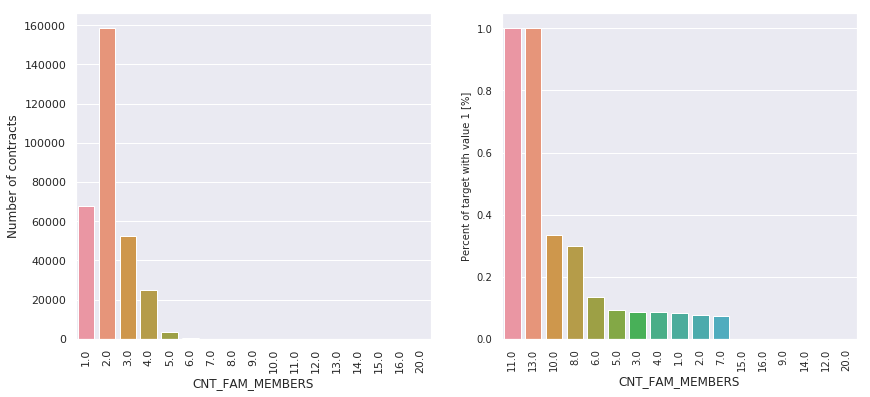

In [13]:
plot_stats('CNT_FAM_MEMBERS', True)

Graphs to illustrate the type of income of the clients. The vast majority are working, followed by commercial associates, pensioner and State servant. 

There is a high number of people not returning loans that income on Maternity leave (almost 40%), followed closely by the Unemployed (about 37%). The other types of incomes sit around the 10% mark for not returning loans.

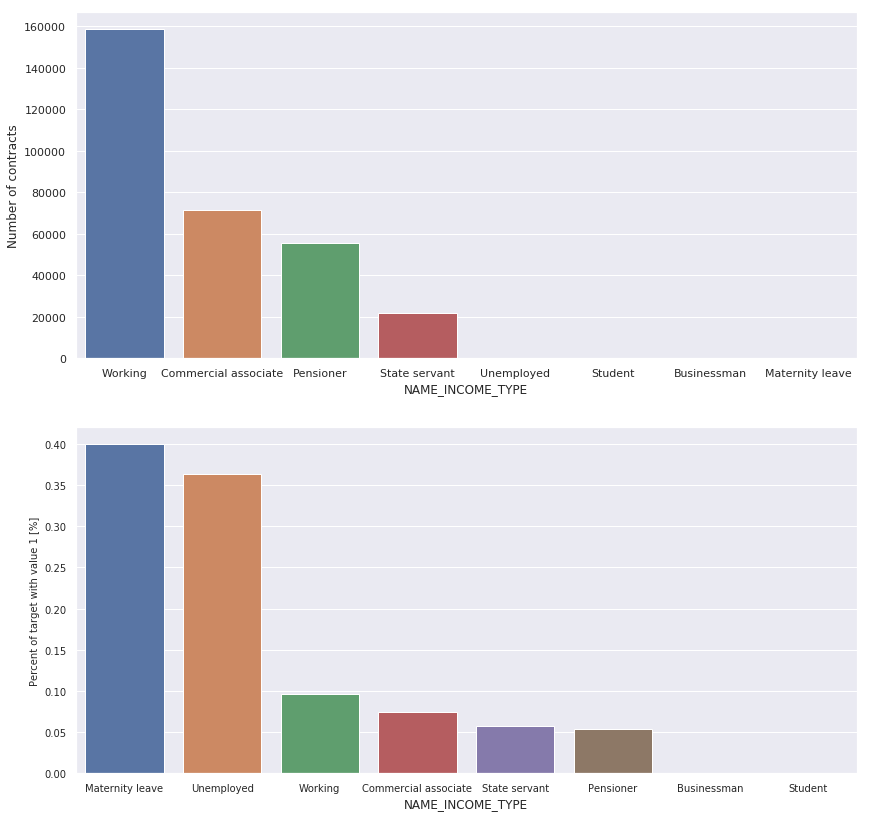

In [14]:
plot_stats('NAME_INCOME_TYPE', False, False)

Plotted two graphs of the occupation type of each of the applicants to show the field of work of most of the clients. It can be noticed that most of the clietns are working as laborers, followed by sales and core staff. It can also be noticed that people in the IT business take the lowest amount of loans.

As expected, the category that had the highest % of not being able to repain their loan are Low-skill Laborers (above 17%), followed by Drivers, Waiters, Security staff and Laborers.

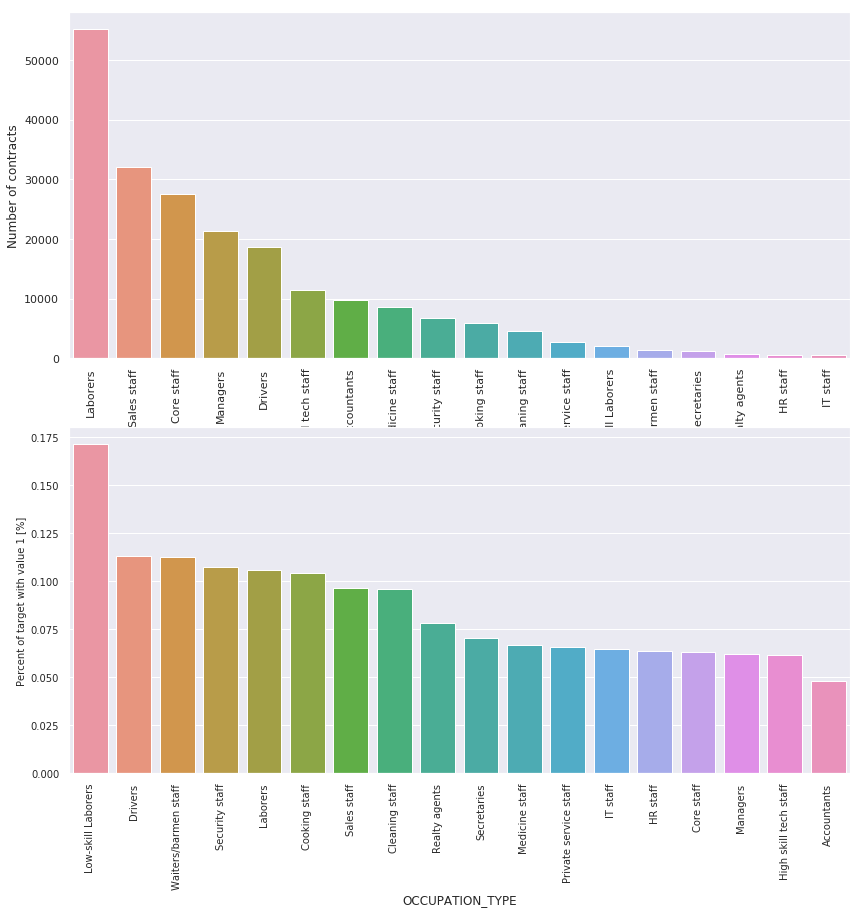

In [15]:
plot_stats('OCCUPATION_TYPE', True, False)

In [16]:
# Plot the distribution of one feature
def plot_distribution(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(), color=color, kde=True, bins=100)
    plt.show()

In [17]:
# Plot the distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var, nrow = 2):
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]
    
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow, 2, figsize=(12, 6*nrow))
    
    for feature in var:
        i += 1
        plt.subplot(nrow, 2, i)
        sns.kdeplot(t1[feature], bw=0.5, label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5, label="TARGET = 0")
        plt.ylabel('Density plot', fontsize = 12)
        plt.xlabel(feature, fontsize = 12)
        locs, labels = plt.xticks()
        plt.tick_params(axis ='both', which='major', labelsize=12)
    plt.show();

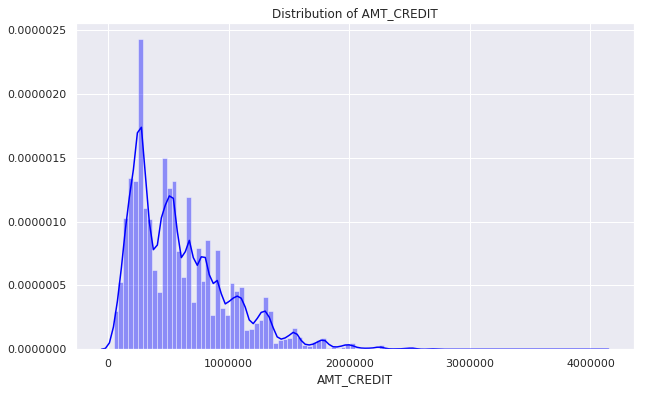

In [18]:
plot_distribution('AMT_CREDIT', 'blue')

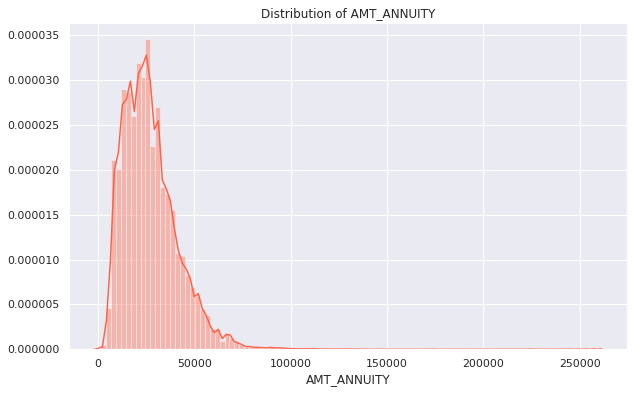

In [19]:
plot_distribution('AMT_ANNUITY', 'tomato')